In [1]:
# Set plot size (for jupyter notebook)
options(repr.plot.width  = 4, repr.plot.height = 3)

In [2]:
library(RColorBrewer)
suppressWarnings(source('h_mdt.R'))

library(plyr)
library(reshape2)
source('h_joindata.R')

library(ggplot2)
theme_set(theme_bw())
library(scales)
library(ggpubr)
library(xtable)
source('f_REL.R')

library(mirt)
source('h_gpcmcoef.R')

Loading required package: magrittr
Warning message:
“package ‘magrittr’ was built under R version 3.5.0”
Attaching package: ‘ggpubr’

The following object is masked from ‘package:plyr’:

    mutate

Loading required package: stats4
Loading required package: lattice


Iteration: 33, Log-Lik: -46137.828, Max-Change: 0.00007
Iteration: 32, Log-Lik: -13852.077, Max-Change: 0.00005
Iteration: 38, Log-Lik: -12819.055, Max-Change: 0.00006


In [3]:
joint_pre17 <- merge(joint_pre17, eap_pre17, by='AnonID', all.x=T)
joint_17 <- merge(joint_17, eap_17, by='AnonID', all.x=T)

In [4]:
joint_pre17_py <- joint_pre17
joint_pre17_py$School <- as.numeric(joint_pre17$School)
joint_pre17_py$Region <- as.numeric(joint_pre17$Region)
joint_17_py <- joint_17
joint_17_py$School <- as.numeric(joint_17$School)
joint_17_py$Region <- as.numeric(joint_17$Region)

In [5]:
for (i in 1:nrow(joint_pre17)) {
    if (is.na(joint_pre17$Y1Fs[i])) {
        joint_pre17_py$Y1Fs.bin[i] <- NA_character_
    } else if (joint_pre17$Y1Fs[i]<=1) {
        joint_pre17_py$Y1Fs.bin[i] <- 'Not-At-Risk'
    } else {
        joint_pre17_py$Y1Fs.bin[i] <- 'At-Risk'
    }
}
for (i in 1:nrow(joint_17)) {
    if (is.na(joint_17$Y1Fs[i])) {
        joint_17_py$Y1Fs.bin[i] <- NA_character_
    } else if (joint_17$Y1Fs[i]<=1) {
        joint_17_py$Y1Fs.bin[i] <- 'Not-At-Risk'
    } else {
        joint_17_py$Y1Fs.bin[i] <- 'At-Risk'
    }
}

In [6]:
# For Python use
write.csv(joint_pre17_py, file='../robject/joint_pre17.csv', row.names=F)
write.csv(joint_17_py, file='../robject/joint_17.csv', row.names=F)

Warning message:
“Removed 4006 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4006 rows containing missing values (geom_point).”Warning message:
“Removed 4083 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4083 rows containing missing values (geom_point).”Warning message:
“Removed 4514 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4514 rows containing missing values (geom_point).”Warning message:
“Removed 1071 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1071 rows containing missing values (geom_point).”Warning message:
“Removed 1101 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1101 rows containing missing values (geom_point).”Warning message:
“Removed 1226 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1226 rows containing missing values (geom_point).”

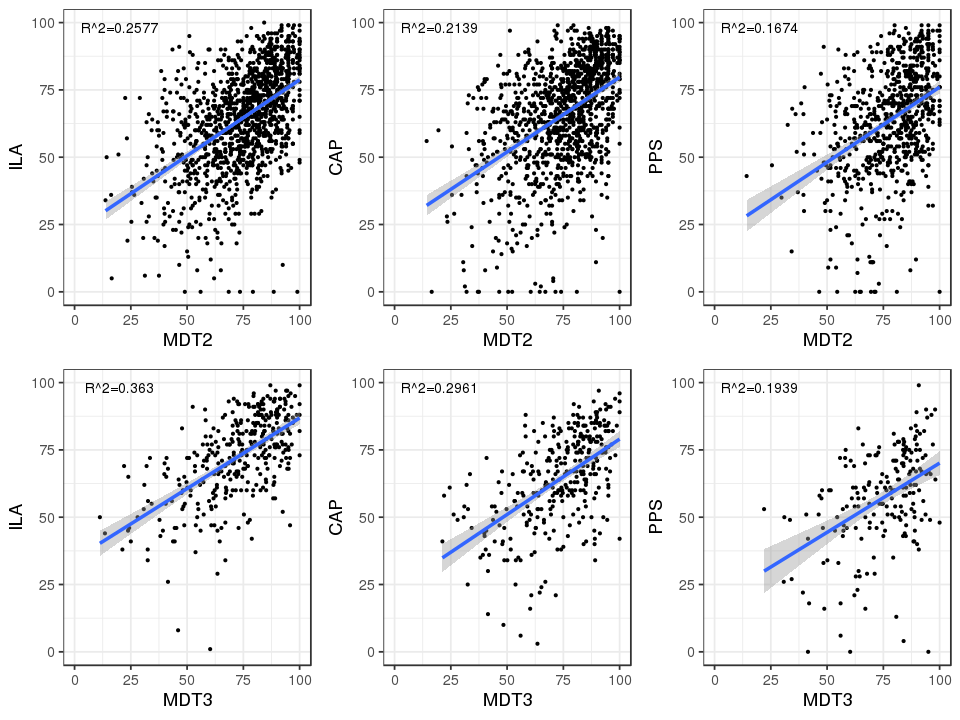

In [8]:
## ----- Section 5.2 DT/ability vs outcomes -----
rsq1 <- summary(lm(ILA~Total, data=joint_pre17))$r.squared
rsq2 <- summary(lm(CAP~Total, data=joint_pre17))$r.squared
rsq3 <- summary(lm(PPS~Total, data=joint_pre17))$r.squared
rsq4 <- summary(lm(ILA~Total, data=joint_17))$r.squared
rsq5 <- summary(lm(CAP~Total, data=joint_17))$r.squared
rsq6 <- summary(lm(PPS~Total, data=joint_17))$r.squared
p1 <- ggplot(joint_pre17, aes(Total, ILA)) + 
    geom_point(size=0.5) + 
    geom_smooth(method='lm') + 
    annotate('text', x=20, y=98, label=paste0('R^2=',round(rsq1,4)), size=3) + 
    coord_cartesian(xlim=c(0,100), ylim=c(0,100)) + 
    labs(x='MDT2')
p2 <- ggplot(joint_pre17, aes(Total, CAP)) + 
    geom_point(size=0.5) + 
    geom_smooth(method='lm') + 
    annotate('text', x=20, y=98, label=paste0('R^2=',round(rsq2,4)), size=3) + 
    coord_cartesian(xlim=c(0,100), ylim=c(0,100)) + 
    labs(x='MDT2')
p3 <- ggplot(joint_pre17, aes(Total, PPS)) + 
    geom_point(size=0.5) + 
    geom_smooth(method='lm') + 
    annotate('text', x=20, y=98, label=paste0('R^2=',round(rsq3,4)), size=3) + 
    coord_cartesian(xlim=c(0,100), ylim=c(0,100)) + 
    labs(x='MDT2')
p4 <- ggplot(joint_17, aes(Total, ILA)) + 
    geom_point(size=0.5) + 
    geom_smooth(method='lm') + 
    annotate('text', x=20, y=98, label=paste0('R^2=',round(rsq4,4)), size=3) + 
    coord_cartesian(xlim=c(0,100), ylim=c(0,100)) + 
    labs(x='MDT3')
p5 <- ggplot(joint_17, aes(Total, CAP)) + 
    geom_point(size=0.5) + 
    geom_smooth(method='lm') + 
    annotate('text', x=20, y=98, label=paste0('R^2=',round(rsq5,4)), size=3) + 
    coord_cartesian(xlim=c(0,100), ylim=c(0,100)) + 
    labs(x='MDT3')
p6 <- ggplot(joint_17, aes(Total, PPS)) + 
    geom_point(size=0.5) + 
    geom_smooth(method='lm') + 
    annotate('text', x=20, y=98, label=paste0('R^2=',round(rsq6,4)), size=3) + 
    coord_cartesian(xlim=c(0,100), ylim=c(0,100)) + 
    labs(x='MDT3')
options(repr.plot.width  = 8, repr.plot.height = 6)
# pdf('../fig/REL_scatter_DT.pdf', width=7, height=5, onefile=F)
ggarrange(p1, p2, p3, p4, p5, p6, ncol=3, nrow=2)
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

Warning message:
“Removed 4006 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4006 rows containing missing values (geom_point).”Warning message:
“Removed 4083 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4083 rows containing missing values (geom_point).”Warning message:
“Removed 4514 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4514 rows containing missing values (geom_point).”Warning message:
“Removed 1071 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1071 rows containing missing values (geom_point).”Warning message:
“Removed 1101 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1101 rows containing missing values (geom_point).”Warning message:
“Removed 1226 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1226 rows containing missing values (geom_point).”

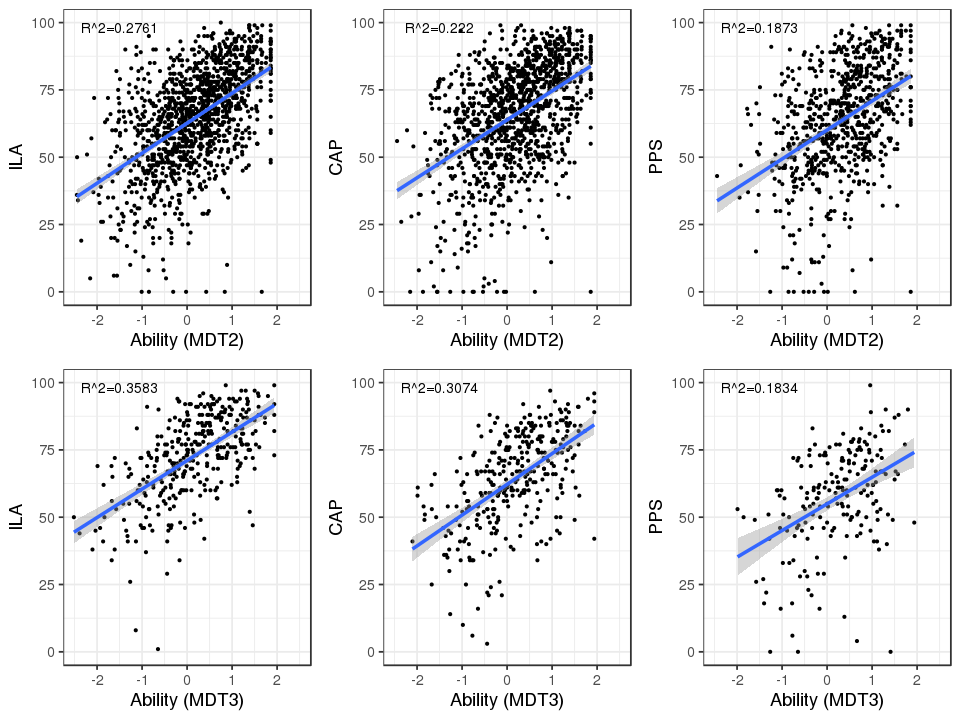

In [9]:
rsq1 <- summary(lm(ILA~F1, data=joint_pre17))$r.squared
rsq2 <- summary(lm(CAP~F1, data=joint_pre17))$r.squared
rsq3 <- summary(lm(PPS~F1, data=joint_pre17))$r.squared
rsq4 <- summary(lm(ILA~F1, data=joint_17))$r.squared
rsq5 <- summary(lm(CAP~F1, data=joint_17))$r.squared
rsq6 <- summary(lm(PPS~F1, data=joint_17))$r.squared
p1 <- ggplot(joint_pre17, aes(F1, ILA)) + 
    geom_point(size=0.5) + 
    geom_smooth(method='lm') + 
    annotate('text', x=-1.5, y=98, label=paste0('R^2=',round(rsq1,4)), size=3) + 
    coord_cartesian(xlim=c(-2.5,2.5), ylim=c(0,100)) + 
    labs(x='Ability (MDT2)')
p2 <- ggplot(joint_pre17, aes(F1, CAP)) + 
    geom_point(size=0.5) + 
    geom_smooth(method='lm') + 
    annotate('text', x=-1.5, y=98, label=paste0('R^2=',round(rsq2,4)), size=3) + 
    coord_cartesian(xlim=c(-2.5,2.5), ylim=c(0,100)) + 
    labs(x='Ability (MDT2)')
p3 <- ggplot(joint_pre17, aes(F1, PPS)) + 
    geom_point(size=0.5) + 
    geom_smooth(method='lm') + 
    annotate('text', x=-1.5, y=98, label=paste0('R^2=',round(rsq3,4)), size=3) + 
    coord_cartesian(xlim=c(-2.5,2.5), ylim=c(0,100)) + 
    labs(x='Ability (MDT2)')
p4 <- ggplot(joint_17, aes(F1, ILA)) + 
    geom_point(size=0.5) + 
    geom_smooth(method='lm') + 
    annotate('text', x=-1.5, y=98, label=paste0('R^2=',round(rsq4,4)), size=3) + 
    coord_cartesian(xlim=c(-2.5,2.5), ylim=c(0,100)) + 
    labs(x='Ability (MDT3)')
p5 <- ggplot(joint_17, aes(F1, CAP)) + 
    geom_point(size=0.5) + 
    geom_smooth(method='lm') + 
    annotate('text', x=-1.5, y=98, label=paste0('R^2=',round(rsq5,4)), size=3) + 
    coord_cartesian(xlim=c(-2.5,2.5), ylim=c(0,100)) + 
    labs(x='Ability (MDT3)')
p6 <- ggplot(joint_17, aes(F1, PPS)) + 
    geom_point(size=0.5) + 
    geom_smooth(method='lm') + 
    annotate('text', x=-1.5, y=98, label=paste0('R^2=',round(rsq6,4)), size=3) + 
    coord_cartesian(xlim=c(-2.5,2.5), ylim=c(0,100)) + 
    labs(x='Ability (MDT3)')
options(repr.plot.width  = 8, repr.plot.height = 6)
# pdf('../fig/REL_scatter_Ability.pdf', width=7, height=5, onefile=F)
ggarrange(p1, p2, p3, p4, p5, p6, ncol=3, nrow=2)
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:55:38 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccccc}
  \hline
 & (0,50] & (50,70] & (70,100] & Unknown & Sum \\ 
  \hline
A & 19 & 69 & 445 & 118 & 651 \\ 
  B & 21 & 74 & 171 & 94 & 360 \\ 
  C & 18 & 70 & 117 & 106 & 311 \\ 
  D & 14 & 41 & 49 & 61 & 165 \\ 
  E & 24 & 35 & 22 & 59 & 140 \\ 
  F & 14 & 16 & 7 & 32 & 69 \\ 
  G & 5 & 4 & 2 & 17 & 28 \\ 
  H & 3 & 3 & 0 & 11 & 17 \\ 
  AN & 1 & 2 & 4 & 13 & 20 \\ 
  Sum & 119 & 314 & 817 & 511 & 1761 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:55:39 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccccc}
  \hline
 & (0,50] & (50,70] & (70,100] & Unknown & Sum \\ 
  \hline
A & 5 & 35 & 180 & 80 & 300 \\ 
  B & 12 & 23 & 31 & 46 & 112 \\ 
  C & 11 & 15 & 5 & 39 & 70 \\ 
  D & 7 & 5 & 5 & 23 & 40 \\ 
  E & 8 & 5 & 0 & 15 & 28 \\ 
  F & 1 & 1 & 0 & 7 & 9 \\ 
  G & 0 & 0 & 0 & 1 & 1 \

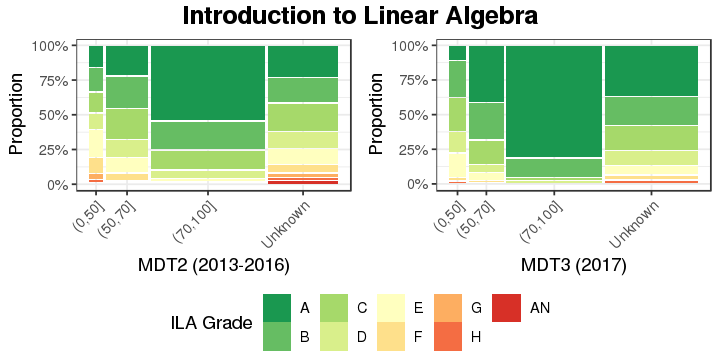

In [10]:
# LaTeX: tab:REL_ILAGrade_vs_MDT
df <- subset(joint_pre17, select=c('AnonID', 'Total', 'ILA.Grade'))
df <- df[!is.na(df$ILA.Grade),]
df$MDTInterval <- cut(df$Total, c(0,50,70,100))
levels(df$MDTInterval) <- c(levels(df$MDTInterval), 'Unknown')
df$MDTInterval[is.na(df$MDTInterval)] <- 'Unknown'
p1 <- stack_prop_tiles(df, MDTInterval, ILA.Grade, xlab='MDT2 (2013-2016)', fac='ILA Grade')

df <- subset(joint_17, select=c('AnonID', 'Total', 'ILA.Grade'))
df <- df[!is.na(df$ILA.Grade),]
df$MDTInterval <- cut(df$Total, c(0,50,70,100))
levels(df$MDTInterval) <- c(levels(df$MDTInterval), 'Unknown')
df$MDTInterval[is.na(df$MDTInterval)] <- 'Unknown'
p2 <- stack_prop_tiles(df, MDTInterval, ILA.Grade, xlab='MDT3 (2017)', fac='ILA Grade')

p <- ggarrange(p1, p2, common.legend=T, legend='bottom')

options(repr.plot.width  = 6, repr.plot.height = 3)
# pdf('../fig/REL_ILAGrade_vs_MDT.pdf', width=7, height=4.5)
annotate_figure(p, top=text_grob('Introduction to Linear Algebra', face='bold', size=15))
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:55:45 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccccc}
  \hline
 & (0,50] & (50,70] & (70,100] & Unknown & Sum \\ 
  \hline
A & 21 & 82 & 456 & 118 & 677 \\ 
  B & 18 & 69 & 147 & 89 & 323 \\ 
  C & 21 & 54 & 99 & 107 & 281 \\ 
  D & 13 & 31 & 46 & 90 & 180 \\ 
  E & 10 & 25 & 19 & 49 & 103 \\ 
  F & 7 & 16 & 6 & 28 & 57 \\ 
  G & 6 & 4 & 1 & 14 & 25 \\ 
  H & 4 & 2 & 3 & 9 & 18 \\ 
  AN & 5 & 5 & 3 & 17 & 30 \\ 
  Sum & 105 & 288 & 780 & 521 & 1694 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:55:45 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccccc}
  \hline
 & (0,50] & (50,70] & (70,100] & Unknown & Sum \\ 
  \hline
A & 1 & 16 & 118 & 56 & 191 \\ 
  B & 5 & 16 & 48 & 34 & 103 \\ 
  C & 10 & 20 & 23 & 43 & 96 \\ 
  D & 5 & 7 & 10 & 21 & 43 \\ 
  E & 13 & 11 & 6 & 32 & 62 \\ 
  F & 1 & 5 & 1 & 11 & 18 \\ 
  G & 2 & 1 & 0 & 8 & 1

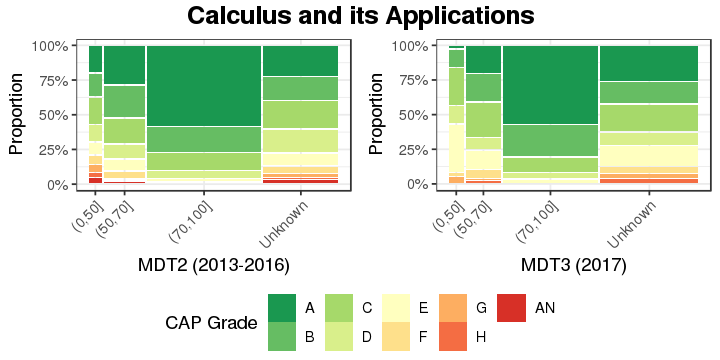

In [11]:
# LaTeX: tab:REL_CAPGrade_vs_MDT
df <- subset(joint_pre17, select=c('AnonID', 'Total', 'CAP.Grade'))
df <- df[!is.na(df$CAP.Grade),]
df$MDTInterval <- cut(df$Total, c(0,50,70,100))
levels(df$MDTInterval) <- c(levels(df$MDTInterval), 'Unknown')
df$MDTInterval[is.na(df$MDTInterval)] <- 'Unknown'
p1 <- stack_prop_tiles(df, MDTInterval, CAP.Grade, xlab='MDT2 (2013-2016)', fac='CAP Grade')

df <- subset(joint_17, select=c('AnonID', 'Total', 'CAP.Grade'))
df <- df[!is.na(df$CAP.Grade),]
df$MDTInterval <- cut(df$Total, c(0,50,70,100))
levels(df$MDTInterval) <- c(levels(df$MDTInterval), 'Unknown')
df$MDTInterval[is.na(df$MDTInterval)] <- 'Unknown'
p2 <- stack_prop_tiles(df, MDTInterval, CAP.Grade, xlab='MDT3 (2017)', fac='CAP Grade')

p <- ggarrange(p1, p2, common.legend=T, legend='bottom')

options(repr.plot.width  = 6, repr.plot.height = 3)
# pdf('../fig/REL_CAPGrade_vs_MDT.pdf', width=7, height=4.5)
annotate_figure(p, top=text_grob('Calculus and its Applications', face='bold', size=15))
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:55:48 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccccc}
  \hline
 & (0,50] & (50,70] & (70,100] & Unknown & Sum \\ 
  \hline
A & 4 & 36 & 268 & 33 & 341 \\ 
  B & 6 & 35 & 105 & 32 & 178 \\ 
  C & 6 & 35 & 92 & 45 & 178 \\ 
  D & 5 & 34 & 35 & 35 & 109 \\ 
  E & 9 & 13 & 17 & 12 & 51 \\ 
  F & 0 & 7 & 9 & 4 & 20 \\ 
  G & 1 & 7 & 3 & 11 & 22 \\ 
  H & 0 & 3 & 2 & 10 & 15 \\ 
  AN & 1 & 5 & 4 & 7 & 17 \\ 
  Sum & 32 & 175 & 535 & 189 & 931 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:55:48 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccccc}
  \hline
 & (0,50] & (50,70] & (70,100] & Unknown & Sum \\ 
  \hline
A & 0 & 9 & 46 & 20 & 75 \\ 
  B & 1 & 10 & 33 & 11 & 55 \\ 
  C & 6 & 11 & 26 & 21 & 64 \\ 
  D & 2 & 7 & 15 & 18 & 42 \\ 
  E & 2 & 5 & 4 & 9 & 20 \\ 
  F & 3 & 5 & 1 & 3 & 12 \\ 
  G & 2 & 2 & 1 & 4 & 9 \\ 
  H & 1 & 2 & 2 

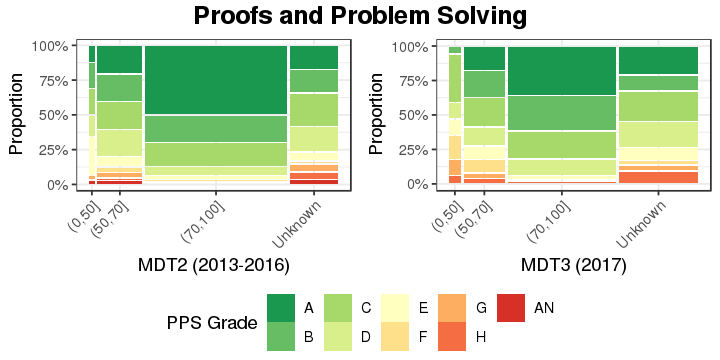

In [12]:
# LaTeX: tab:REL_PPSGrade_vs_MDT
df <- subset(joint_pre17, select=c('AnonID', 'Total', 'PPS.Grade'))
df <- df[!is.na(df$PPS.Grade),]
df$MDTInterval <- cut(df$Total, c(0,50,70,100))
levels(df$MDTInterval) <- c(levels(df$MDTInterval), 'Unknown')
df$MDTInterval[is.na(df$MDTInterval)] <- 'Unknown'
p1 <- stack_prop_tiles(df, MDTInterval, PPS.Grade, xlab='MDT2 (2013-2016)', fac='PPS Grade')

df <- subset(joint_17, select=c('AnonID', 'Total', 'PPS.Grade'))
df <- df[!is.na(df$PPS.Grade),]
df$MDTInterval <- cut(df$Total, c(0,50,70,100))
levels(df$MDTInterval) <- c(levels(df$MDTInterval), 'Unknown')
df$MDTInterval[is.na(df$MDTInterval)] <- 'Unknown'
p2 <- stack_prop_tiles(df, MDTInterval, PPS.Grade, xlab='MDT3 (2017)', fac='PPS Grade')

p <- ggarrange(p1, p2, common.legend=T, legend='bottom')

options(repr.plot.width  = 6, repr.plot.height = 3)
# pdf('../fig/REL_PPSGrade_vs_MDT.pdf', width=7, height=4.5)
annotate_figure(p, top=text_grob('Proofs and Problem Solving', face='bold', size=15))
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:55:52 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccccc}
  \hline
 & (0,50] & (50,70] & (70,100] & Unknown & Sum \\ 
  \hline
0 & 11 & 86 & 415 & 71 & 583 \\ 
  1 & 8 & 28 & 63 & 30 & 129 \\ 
  2 & 5 & 27 & 28 & 23 & 83 \\ 
  3 & 8 & 28 & 17 & 29 & 82 \\ 
  Sum & 32 & 169 & 523 & 153 & 877 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:55:52 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccccc}
  \hline
 & (0,50] & (50,70] & (70,100] & Unknown & Sum \\ 
  \hline
0 & 5 & 21 & 98 & 40 & 164 \\ 
  1 & 4 & 15 & 16 & 9 & 44 \\ 
  2 & 4 & 5 & 7 & 15 & 31 \\ 
  3 & 3 & 5 & 0 & 9 & 17 \\ 
  Sum & 16 & 46 & 121 & 73 & 256 \\ 
   \hline
\end{tabular}
\end{table}


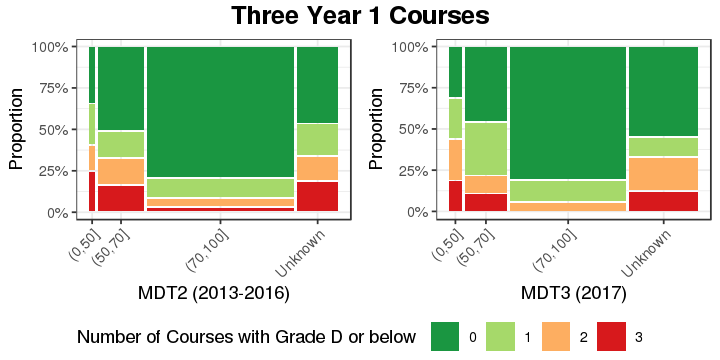

In [13]:
# LaTeX : tab:REL_Y1Fs_vs_MDT_5070
df <- subset(joint_pre17, select=c('AnonID', 'Total', 'Y1Fs'))
df <- df[!is.na(df$Y1Fs),]
df$MDTInterval <- cut(df$Total, c(0,50,70,100))
levels(df$MDTInterval) <- c(levels(df$MDTInterval), 'Unknown')
df$MDTInterval[is.na(df$MDTInterval)] <- 'Unknown'
p1 <- stack_prop_tiles(df, MDTInterval, Y1Fs, xlab='MDT2 (2013-2016)', fac='Number of Courses with Grade D or below')

df <- subset(joint_17, select=c('AnonID', 'Total', 'Y1Fs'))
df <- df[!is.na(df$Y1Fs),]
df$MDTInterval <- cut(df$Total, c(0,50,70,100))
levels(df$MDTInterval) <- c(levels(df$MDTInterval), 'Unknown')
df$MDTInterval[is.na(df$MDTInterval)] <- 'Unknown'
p2 <- stack_prop_tiles(df, MDTInterval, Y1Fs, xlab='MDT3 (2017)', fac='Number of Courses with Grade D or below')

p <- ggarrange(p1, p2, common.legend=T, legend='bottom')

options(repr.plot.width  = 6, repr.plot.height = 3)
# pdf('../fig/REL_Y1Fs_vs_MDT_5070.pdf', width=7, height=4.5)
annotate_figure(p, top=text_grob('Three Year 1 Courses', face='bold', size=15))
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:55:55 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccccc}
  \hline
 & (0,50] & (50,70] & (70,100] & Unknown & Sum \\ 
  \hline
0 & 5 & 48 & 233 & 26 & 312 \\ 
  1 & 5 & 15 & 48 & 12 & 80 \\ 
  2 & 3 & 10 & 13 & 12 & 38 \\ 
  3 & 4 & 11 & 11 & 12 & 38 \\ 
  Sum & 17 & 84 & 305 & 62 & 468 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:55:55 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccccc}
  \hline
 & (0,50] & (50,70] & (70,100] & Unknown & Sum \\ 
  \hline
0 & 2 & 14 & 43 & 19 & 78 \\ 
  1 & 3 & 8 & 9 & 1 & 21 \\ 
  2 & 4 & 4 & 5 & 3 & 16 \\ 
  3 & 2 & 3 & 0 & 4 & 9 \\ 
  Sum & 11 & 29 & 57 & 27 & 124 \\ 
   \hline
\end{tabular}
\end{table}


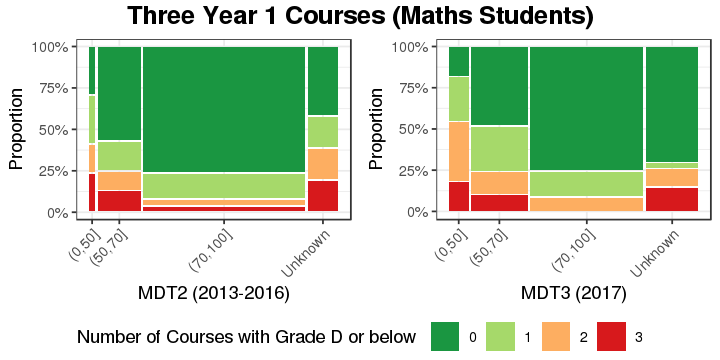

In [14]:
# LaTeX : tab:REL_Y1Fs_vs_MDT_maths
df <- subset(joint_pre17, School=='Mathematics', select=c('AnonID', 'Total', 'Y1Fs'))
df <- df[!is.na(df$Y1Fs),]
df$MDTInterval <- cut(df$Total, c(0,50,70,100))
levels(df$MDTInterval) <- c(levels(df$MDTInterval), 'Unknown')
df$MDTInterval[is.na(df$MDTInterval)] <- 'Unknown'
p1 <- stack_prop_tiles(df, MDTInterval, Y1Fs, xlab='MDT2 (2013-2016)', fac='Number of Courses with Grade D or below')

df <- subset(joint_17, School=='Mathematics', select=c('AnonID', 'Total', 'Y1Fs'))
df <- df[!is.na(df$Y1Fs),]
df$MDTInterval <- cut(df$Total, c(0,50,70,100))
levels(df$MDTInterval) <- c(levels(df$MDTInterval), 'Unknown')
df$MDTInterval[is.na(df$MDTInterval)] <- 'Unknown'
p2 <- stack_prop_tiles(df, MDTInterval, Y1Fs, xlab='MDT3 (2017)', fac='Number of Courses with Grade D or below')

p <- ggarrange(p1, p2, common.legend=T, legend='bottom')

options(repr.plot.width  = 6, repr.plot.height = 3)
# pdf('../fig/REL_Y1Fs_vs_MDT_maths.pdf', width=7, height=4.5)
annotate_figure(p, top=text_grob('Three Year 1 Courses (Maths Students)', face='bold', size=15))
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:55:59 2018
\begin{table}[ht]
\centering
\begin{tabular}{rcccccc}
  \hline
 & (0,50] & (50,60] & (60,70] & (70,100] & Unknown & Sum \\ 
  \hline
0 & 11 & 30 & 56 & 415 & 71 & 583 \\ 
  1 & 8 & 11 & 17 & 63 & 30 & 129 \\ 
  2 & 5 & 16 & 11 & 28 & 23 & 83 \\ 
  3 & 8 & 12 & 16 & 17 & 29 & 82 \\ 
  Sum & 32 & 69 & 100 & 523 & 153 & 877 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:55:59 2018
\begin{table}[ht]
\centering
\begin{tabular}{rcccccc}
  \hline
 & (0,50] & (50,60] & (60,70] & (70,100] & Unknown & Sum \\ 
  \hline
0 & 5 & 7 & 14 & 98 & 40 & 164 \\ 
  1 & 4 & 6 & 9 & 16 & 9 & 44 \\ 
  2 & 4 & 3 & 2 & 7 & 15 & 31 \\ 
  3 & 3 & 1 & 4 & 0 & 9 & 17 \\ 
  Sum & 16 & 17 & 29 & 121 & 73 & 256 \\ 
   \hline
\end{tabular}
\end{table}


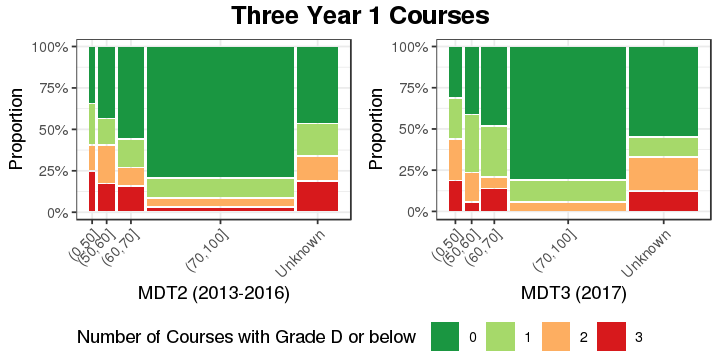

In [15]:
# LaTeX : tab:REL_Y1Fs_vs_MDT_506070
df <- subset(joint_pre17, select=c('AnonID', 'Total', 'Y1Fs'))
df <- df[!is.na(df$Y1Fs),]
df$MDTInterval <- cut(df$Total, c(0,50,60,70,100))
levels(df$MDTInterval) <- c(levels(df$MDTInterval), 'Unknown')
df$MDTInterval[is.na(df$MDTInterval)] <- 'Unknown'
p1 <- stack_prop_tiles(df, MDTInterval, Y1Fs, xlab='MDT2 (2013-2016)', fac='Number of Courses with Grade D or below')

df <- subset(joint_17, select=c('AnonID', 'Total', 'Y1Fs'))
df <- df[!is.na(df$Y1Fs),]
df$MDTInterval <- cut(df$Total, c(0,50,60,70,100))
levels(df$MDTInterval) <- c(levels(df$MDTInterval), 'Unknown')
df$MDTInterval[is.na(df$MDTInterval)] <- 'Unknown'
p2 <- stack_prop_tiles(df, MDTInterval, Y1Fs, xlab='MDT3 (2017)', fac='Number of Courses with Grade D or below')

p <- ggarrange(p1, p2, common.legend=T, legend='bottom')

options(repr.plot.width  = 6, repr.plot.height = 3)
# pdf('../fig/REL_Y1Fs_vs_MDT_506070.pdf', width=7, height=4.5)
annotate_figure(p, top=text_grob('Three Year 1 Courses', face='bold', size=15))
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

In [16]:
## ----- Section 5.3 Qual vs outcomes -----
df <- subset(joint_17, select=c('AnonID', 'Category', 'Region', 'ILA', 'CAP', 'PPS', 'AAC', 'APPS'))
df <- df[rowSums(is.na(df[4:8]))!=5,]
# LaTeX: tab:REL_freq_qual
print(xtable(t(addmargins(table(df$Category))), digits=rep(0,6)), include.rownames=F)

df$Category[grep('Cat', df$Category)] <- 'Known'
print(xtable(addmargins(table(df$Category, df$Region)), digits=rep(0,6)))

% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:56:02 2018
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
Cat1 & Cat2 & Cat3 & Unknown & Sum \\ 
  \hline
120 & 48 & 245 & 295 & 708 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:56:02 2018
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrr}
  \hline
 & Overseas & EU & RUK & Scotland & Sum \\ 
  \hline
Known & 78 & 31 & 136 & 168 & 413 \\ 
  Unknown & 118 & 90 & 62 & 25 & 295 \\ 
  Sum & 196 & 121 & 198 & 193 & 708 \\ 
   \hline
\end{tabular}
\end{table}


% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:56:02 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccccc}
  \hline
 & Cat1 & Cat2 & Cat3 & Unknown & Sum \\ 
  \hline
A & 33 & 15 & 159 & 93 & 300 \\ 
  B & 23 & 11 & 47 & 31 & 112 \\ 
  C & 18 & 7 & 24 & 21 & 70 \\ 
  D & 15 & 8 & 8 & 9 & 40 \\ 
  E & 18 & 4 & 1 & 5 & 28 \\ 
  F & 5 & 1 & 1 & 2 & 9 \\ 
  G & 1 & 0 & 0 & 0 & 1 \\ 
  H & 4 & 0 & 1 & 3 & 8 \\ 
  AN & 0 & 0 & 0 & 0 & 0 \\ 
  Sum & 117 & 46 & 241 & 164 & 568 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:56:02 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccccc}
  \hline
 & Cat1 & Cat2 & Cat3 & Unknown & Sum \\ 
  \hline
A & 16 & 3 & 100 & 72 & 191 \\ 
  B & 12 & 9 & 53 & 29 & 103 \\ 
  C & 13 & 13 & 34 & 36 & 96 \\ 
  D & 11 & 6 & 13 & 13 & 43 \\ 
  E & 26 & 10 & 13 & 13 & 62 \\ 
  F & 10 & 2 & 3 & 3 & 18 \\ 
  G & 4 & 1 & 3 & 3 & 11 \\ 
  H & 3 & 1 & 2 & 4 & 10 \\ 
  AN

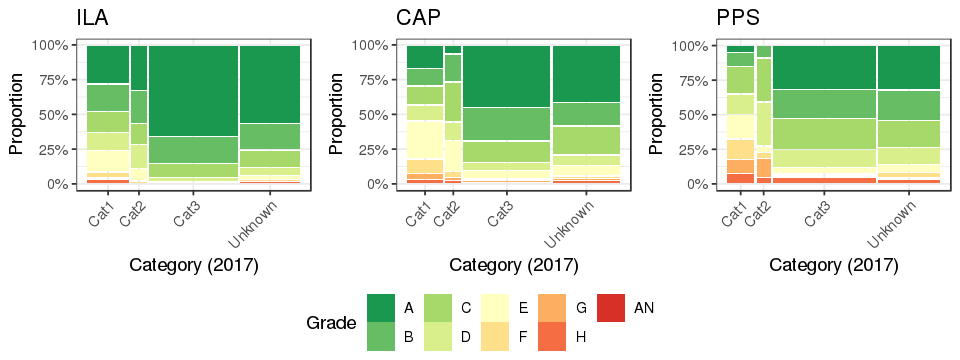

In [17]:
# LaTeX: tab:REL_ILAGrade_vs_Qual
df <- subset(joint_17, select=c('AnonID', 'Category', 'ILA.Grade'))
df <- df[!is.na(df$ILA.Grade),]
p1 <- stack_prop_tiles(df, Category, ILA.Grade, title='ILA', xlab='Category (2017)', fac='Grade')

# LaTeX: tab:REL_CAPGrade_vs_Qual
df <- subset(joint_17, select=c('AnonID', 'Category', 'CAP.Grade'))
df <- df[!is.na(df$CAP.Grade),]
p2 <- stack_prop_tiles(df, Category, CAP.Grade, title='CAP', xlab='Category (2017)', fac='Grade')

# LaTeX: tab:REL_PPSGrade_vs_Qual
df <- subset(joint_17, select=c('AnonID', 'Category', 'PPS.Grade'))
df <- df[!is.na(df$PPS.Grade),]
p3 <- stack_prop_tiles(df, Category, PPS.Grade, title='PPS', xlab='Category (2017)', fac='Grade')

options(repr.plot.width  = 8, repr.plot.height = 3)
# pdf('../fig/REL_Grade_vs_Qual.pdf', width=7, height=3.5, onefile=F)
ggarrange(p1, p2, p3, ncol=3, common.legend=T, legend='bottom')
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:56:07 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccccc}
  \hline
 & Cat1 & Cat2 & Cat3 & Unknown & Sum \\ 
  \hline
0 & 13 & 7 & 99 & 45 & 164 \\ 
  1 & 4 & 6 & 23 & 11 & 44 \\ 
  2 & 10 & 6 & 13 & 2 & 31 \\ 
  3 & 9 & 2 & 4 & 2 & 17 \\ 
  Sum & 36 & 21 & 139 & 60 & 256 \\ 
   \hline
\end{tabular}
\end{table}


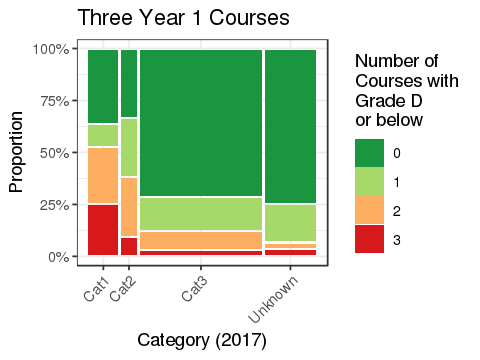

In [18]:
# LaTeX: tab:REL_Y1Fs_vs_Qual
df <- subset(joint_17, select=c('AnonID', 'Category', 'Y1Fs'))
df <- df[!is.na(df$Y1Fs),]

# pdf('../fig/REL_Y1Fs_vs_Qual.pdf', width=4.5, height=3.5)
stack_prop_tiles(df, Category, Y1Fs, title='Three Year 1 Courses', xlab='Category (2017)', fac='Number of\nCourses with\nGrade D\nor below')
# dev.off()

% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:56:08 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccccc}
  \hline
 & Cat1 & Cat2 & Cat3 & Unknown & Sum \\ 
  \hline
0 & 2 & 5 & 60 & 11 & 78 \\ 
  1 & 2 & 5 & 12 & 2 & 21 \\ 
  2 & 6 & 3 & 7 & 0 & 16 \\ 
  3 & 3 & 1 & 4 & 1 & 9 \\ 
  Sum & 13 & 14 & 83 & 14 & 124 \\ 
   \hline
\end{tabular}
\end{table}


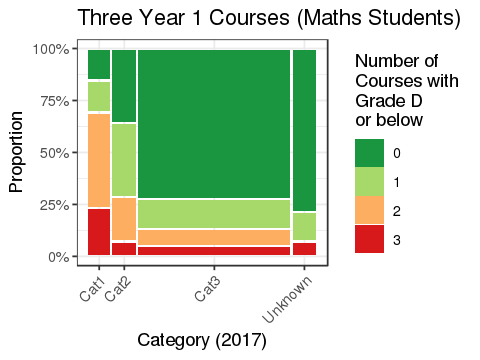

In [19]:
# LaTeX: tab:REL_Y1Fs_vs_Qual_maths
df <- subset(joint_17, School=='Mathematics', select=c('AnonID', 'Category', 'Y1Fs'))
df <- df[!is.na(df$Y1Fs),]

# pdf('../fig/REL_Y1Fs_vs_Qual_maths.pdf', width=4.5, height=3.5)
stack_prop_tiles(df, Category, Y1Fs, title='Three Year 1 Courses (Maths Students)', xlab='Category (2017)', fac='Number of\nCourses with\nGrade D\nor below')
# dev.off()

% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:56:09 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccccc}
  \hline
 & Cat1 & Cat2 & Cat3 & Unknown & Sum \\ 
  \hline
(70,100] & 21 & 14 & 123 & 73 & 231 \\ 
  (60,70] & 8 & 8 & 19 & 22 & 57 \\ 
  (50,60] & 12 & 3 & 9 & 9 & 33 \\ 
  (0,50] & 21 & 7 & 9 & 11 & 48 \\ 
  Sum & 62 & 32 & 160 & 115 & 369 \\ 
   \hline
\end{tabular}
\end{table}


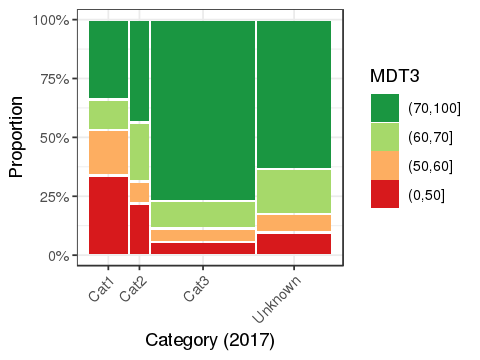

In [20]:
## ----- Section 5.3.2 DT vs Qual -----

# LaTeX: tab:REL_MDT_vs_Qual
df <- subset(joint_17, select=c('AnonID', 'Total', 'Category', 'ILA', 'CAP', 'PPS'))
df <- df[rowSums(is.na(df[4:6]))!=3,]
df$MDTInterval <- cut(df$Total, c(0,50,60,70,100))
# df$MDTInterval <- factor(as.character(df$MDTInterval), levels=c(rev(levels(df$MDTInterval)), 'Unknown'))
# df$MDTInterval[is.na(df$MDTInterval)] <- 'Unknown'
df$MDTInterval <- factor(as.character(df$MDTInterval), levels=rev(levels(df$MDTInterval)))

# pdf('../fig/REL_MDT_vs_Qual.pdf', width=4.5, height=3.5)
stack_prop_tiles(df, Category, MDTInterval, xlab='Category (2017)', fac='MDT3')
# dev.off()

% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:56:10 2018
\begin{table}[ht]
\centering
\begin{tabular}{rcccccccc}
  \hline
 & Cat1- & Cat1+ & Cat2- & Cat2+ & Cat3- & Cat3+ & Unknown & Sum \\ 
  \hline
0 & 6 & 7 & 2 & 5 & 12 & 87 & 45 & 164 \\ 
  1 & 3 & 1 & 2 & 4 & 8 & 15 & 11 & 44 \\ 
  2 & 8 & 2 & 4 & 2 & 4 & 9 & 2 & 31 \\ 
  3 & 9 & 0 & 2 & 0 & 2 & 2 & 2 & 17 \\ 
  Sum & 26 & 10 & 10 & 11 & 26 & 113 & 60 & 256 \\ 
   \hline
\end{tabular}
\end{table}


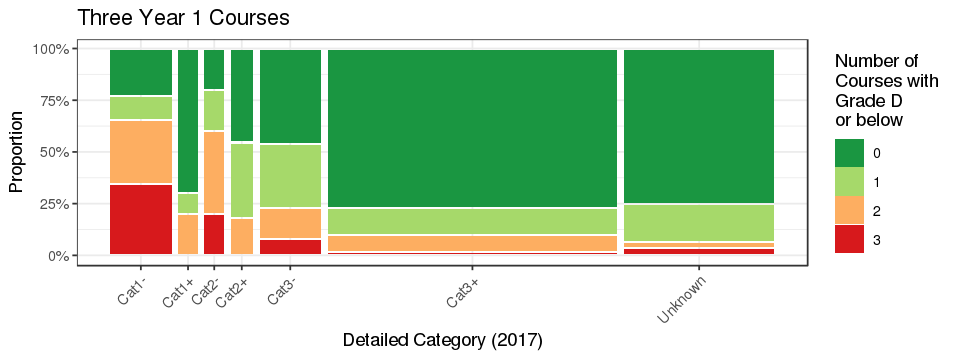

In [21]:
## ----- Section 5.4 Combining two -----

# LaTeX: tab:REL_Y1Fs_vs_NewCat_all
df <- subset(joint_17, select=c('AnonID', 'Total', 'Category', 'Y1Fs'))
df <- df[!is.na(df$Y1Fs),]
df$NewCat <- 'Unknown'
for (i in 1:nrow(df)) {
    if (df$Category[i]=='Cat1') {
        if (is.na(df$Total[i])) {
            df$NewCat[i] <- 'Cat1-'
        } else if (df$Total[i]<=70) {
            df$NewCat[i] <- 'Cat1-'
        } else {
            df$NewCat[i] <- 'Cat1+'
        }
    } else if (df$Category[i]=='Cat2') {
        if (is.na(df$Total[i])) {
            df$NewCat[i] <- 'Cat2-'
        } else if (df$Total[i]<=60) {
            df$NewCat[i] <- 'Cat2-'
        } else {
            df$NewCat[i] <- 'Cat2+'
        }
    } else if (df$Category[i]=='Cat3') {
        if (is.na(df$Total[i])) {
            df$NewCat[i] <- 'Cat3+'
        } else if (df$Total[i]<=70) {
            df$NewCat[i] <- 'Cat3-'
        } else {
            df$NewCat[i] <- 'Cat3+'
        }
    } else {
        if (is.na(df$Total[i])) {
            df$NewCat[i] <- 'Unknown'
        } else if (df$Total[i]<=60) {
            df$NewCat[i] <- 'Unknown'
        } else {
            df$NewCat[i] <- 'Unknown'
        }
    }
}

options(repr.plot.width  = 8, repr.plot.height = 3)
# pdf('../fig/REL_Y1Fs_vs_NewCat_all.pdf', width=7, height=3.5)
stack_prop_tiles(df, NewCat, Y1Fs, title='Three Year 1 Courses', xlab='Detailed Category (2017)', fac='Number of\nCourses with\nGrade D\nor below')
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:56:12 2018
\begin{table}[ht]
\centering
\begin{tabular}{rcccc}
  \hline
 & Cat- & Cat+ & Unknown & Sum \\ 
  \hline
0 & 24 & 132 & 8 & 164 \\ 
  1 & 15 & 25 & 4 & 44 \\ 
  2 & 16 & 13 & 2 & 31 \\ 
  3 & 14 & 3 & 0 & 17 \\ 
  Sum & 69 & 173 & 14 & 256 \\ 
   \hline
\end{tabular}
\end{table}


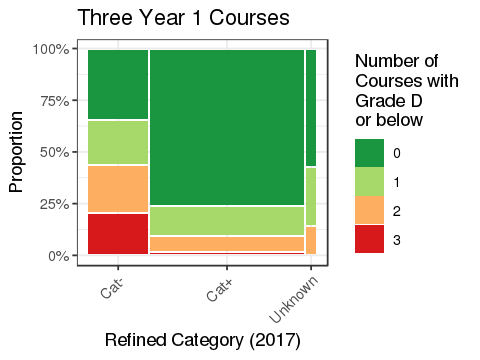

In [22]:
## ----- Section 5.4 Combining two -----

# LaTeX: tab:REL_Y1Fs_vs_NewCat
df <- subset(joint_17, select=c('AnonID', 'Total', 'Category', 'Y1Fs'))
df <- df[!is.na(df$Y1Fs),]
df$NewCat <- 'Unknown'
for (i in 1:nrow(df)) {
    if (df$Category[i]=='Cat1') {
        if (is.na(df$Total[i])) {
            df$NewCat[i] <- 'Cat-'
        } else if (df$Total[i]<=70) {
            df$NewCat[i] <- 'Cat-'
        } else {
            df$NewCat[i] <- 'Cat+'
        }
    } else if (df$Category[i]=='Cat2') {
        if (is.na(df$Total[i])) {
            df$NewCat[i] <- 'Cat-'
        } else if (df$Total[i]<=60) {
            df$NewCat[i] <- 'Cat-'
        } else {
            df$NewCat[i] <- 'Cat+'
        }
    } else if (df$Category[i]=='Cat3') {
        if (is.na(df$Total[i])) {
            df$NewCat[i] <- 'Cat+'
        } else if (df$Total[i]<=70) {
            df$NewCat[i] <- 'Cat-'
        } else {
            df$NewCat[i] <- 'Cat+'
        }
    } else {
        if (is.na(df$Total[i])) {
            df$NewCat[i] <- 'Unknown'
        } else if (df$Total[i]<=60) {
            df$NewCat[i] <- 'Cat-'
        } else {
            df$NewCat[i] <- 'Cat+'
        }
    }
}

# pdf('../fig/REL_Y1Fs_vs_NewCat.pdf', width=4.5, height=3.5)
stack_prop_tiles(df, NewCat, Y1Fs, title='Three Year 1 Courses', xlab='Refined Category (2017)', fac='Number of\nCourses with\nGrade D\nor below')
# dev.off()

In [23]:
# Previous cell must be run! 
for (i in 1:nrow(df)) {
    if (df$NewCat[i] == 'Cat-') {
        df$Predicted[i] <- 'Pred.Pos'
    } else if (df$NewCat[i] == 'Cat+') {
        df$Predicted[i] <- 'Pred.Neg'
    } else {
        df$Predicted[i] <- NA_character_
    }
}
for (i in 1:nrow(df)) {
    if (df$Y1Fs[i] <= 1) {
        df$True[i] <- 'True.Neg'
    } else {
        df$True[i] <- 'True.Pos'
    }
}
df$True <- factor(df$True, levels=c('True.Pos','True.Neg'))
df$Predicted <- factor(df$Predicted, levels=c('Pred.Pos','Pred.Neg'))
cm_NewCat <- table(df$True, df$Predicted)
print(xtable(cm_NewCat, align=c('r','c','c')))

% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:56:13 2018
\begin{table}[ht]
\centering
\begin{tabular}{rcc}
  \hline
 & Pred.Pos & Pred.Neg \\ 
  \hline
True.Pos &  30 &  16 \\ 
  True.Neg &  39 & 157 \\ 
   \hline
\end{tabular}
\end{table}


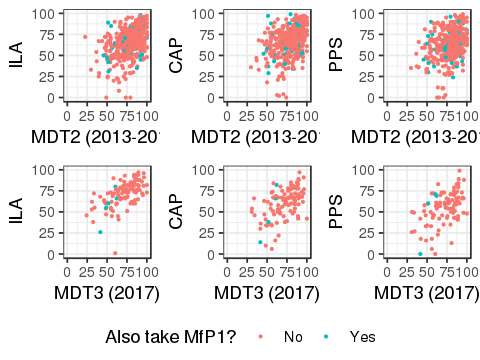

In [24]:
## ----- Section 5.5 Extra maths courses -----
df <- subset(joint_pre17, School=='Mathematics', select=c('Total','ILA','ILA.MfP1'))
df <- df[complete.cases(df),]
p1 <- ggplot(df, aes(Total, ILA)) + 
    geom_point(aes(col=ILA.MfP1), size=0.5) + 
    coord_cartesian(xlim=c(0,100), ylim=c(0,100)) + 
    labs(x='MDT2 (2013-2016)', col='Also take MfP1?')

df <- subset(joint_pre17, School=='Mathematics', select=c('Total','CAP','CAP.MfP1'))
df <- df[complete.cases(df),]
p2 <- ggplot(df, aes(Total, CAP)) + 
    geom_point(aes(col=CAP.MfP1), size=0.5) + 
    coord_cartesian(xlim=c(0,100), ylim=c(0,100)) + 
    labs(x='MDT2 (2013-2016)', col='Also take MfP1?')

df <- subset(joint_pre17, School=='Mathematics', select=c('Total','PPS','PPS.MfP1'))
df <- df[complete.cases(df),]
p3 <- ggplot(df, aes(Total, PPS)) + 
    geom_point(aes(col=PPS.MfP1), size=0.5) + 
    coord_cartesian(xlim=c(0,100), ylim=c(0,100)) + 
    labs(x='MDT2 (2013-2016)', col='Also take MfP1?')

df <- subset(joint_17, School=='Mathematics', select=c('Total','ILA','ILA.MfP1'))
df <- df[complete.cases(df),]
p4 <- ggplot(df, aes(Total, ILA)) + 
    geom_point(aes(col=ILA.MfP1), size=0.5) + 
    coord_cartesian(xlim=c(0,100), ylim=c(0,100)) + 
    labs(x='MDT3 (2017)', col='Also take MfP1?')

df <- subset(joint_17, School=='Mathematics', select=c('Total','CAP','CAP.MfP1'))
df <- df[complete.cases(df),]
p5 <- ggplot(df, aes(Total, CAP)) + 
    geom_point(aes(col=CAP.MfP1), size=0.5) + 
    coord_cartesian(xlim=c(0,100), ylim=c(0,100)) + 
    labs(x='MDT3 (2017)', col='Also take MfP1?')

df <- subset(joint_17, School=='Mathematics', select=c('Total','PPS','PPS.MfP1'))
df <- df[complete.cases(df),]
p6 <- ggplot(df, aes(Total, PPS)) + 
    geom_point(aes(col=PPS.MfP1), size=0.5) + 
    coord_cartesian(xlim=c(0,100), ylim=c(0,100)) + 
    labs(x='MDT3 (2017)', col='Also take MfP1?')

# pdf('../fig/REL_scatter_MfP1.pdf', width=7, height=5, onefile=F)
ggarrange(p1, p2, p3, p4, p5, p6, ncol=3, nrow=2, common.legend=T, legend='bottom')
# dev.off()

% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:56:18 2018
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrr}
  \hline
 & Df & Sum Sq & Mean Sq & F value & Pr($>$F) \\ 
  \hline
ILA.MfP1 & 1 & 209 & 208.87 & 0.661 & 0.419 \\ 
  Residuals & 72 & 22754 & 316.03 &  &  \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:56:18 2018
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrr}
  \hline
 & Df & Sum Sq & Mean Sq & F value & Pr($>$F) \\ 
  \hline
CAP.MfP1 & 1 & 33 & 33.33 & 0.088 & 0.768 \\ 
  Residuals & 66 & 25064 & 379.75 &  &  \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-3 package
% Sun Oct  7 22:56:18 2018
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrr}
  \hline
 & Df & Sum Sq & Mean Sq & F value & Pr($>$F) \\ 
  \hline
PPS.MfP1 & 1 & 35 & 34.79 & 0.098 & 0.755 \\ 
  Residuals & 65 & 23121 & 355.71 &  &  \\ 
   \hline
\end{tabular}
\end{table}

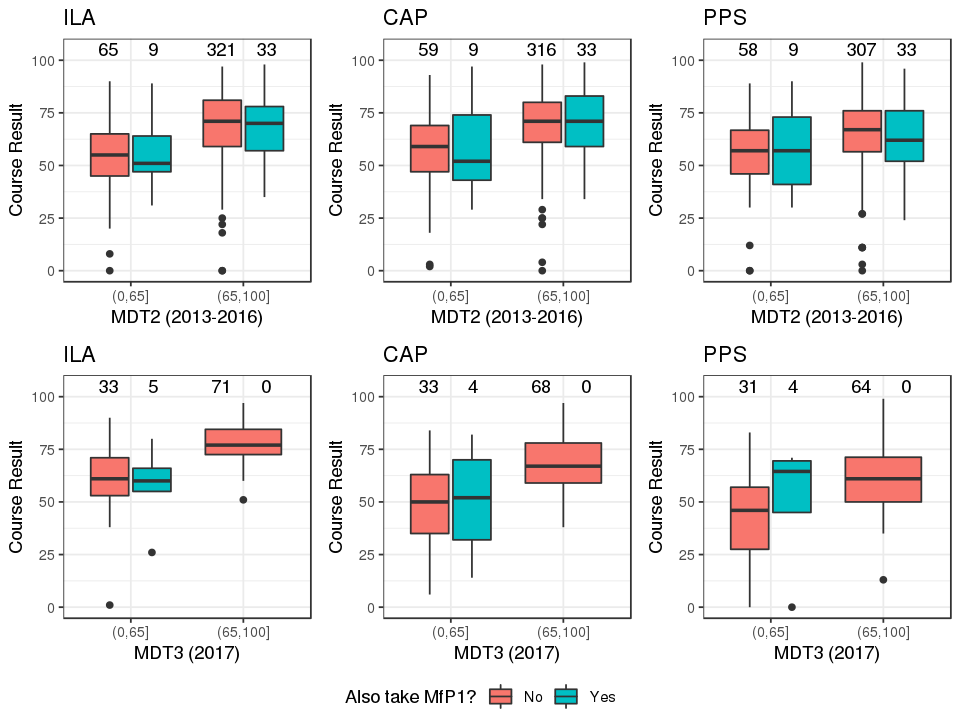

In [25]:
p1 <- split_boxplot(joint_pre17, 'ILA', xlab='MDT2 (2013-2016)', latex=T)
p2 <- split_boxplot(joint_pre17, 'CAP', xlab='MDT2 (2013-2016)', latex=T)
p3 <- split_boxplot(joint_pre17, 'PPS', xlab='MDT2 (2013-2016)', latex=T)
p4 <- split_boxplot(joint_17, 'ILA', xlab='MDT3 (2017)', latex=T)
p5 <- split_boxplot(joint_17, 'CAP', xlab='MDT3 (2017)', latex=T)
p6 <- split_boxplot(joint_17, 'PPS', xlab='MDT3 (2017)', latex=T)
options(repr.plot.width  = 8, repr.plot.height = 6)
# pdf('../fig/REL_splitbox.pdf', width=7, height=5.5, onefile=F)
ggarrange(p1, p2, p3, p4, p5, p6, ncol=3, nrow=2, common.legend=T, legend='bottom')
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

,0,1,2,3,Sum
"(0,50]",11,8,5,8,32
"(50,60]",30,11,16,12,69
"(60,70]",56,17,11,16,100
"(70,100]",415,63,28,17,523
Sum,512,99,60,53,724


,0,1,2,3,Sum
"(0,50]",5,4,4,3,16
"(50,60]",7,6,3,1,17
"(60,70]",14,9,2,4,29
"(70,100]",98,16,7,0,121
Sum,124,35,16,8,183


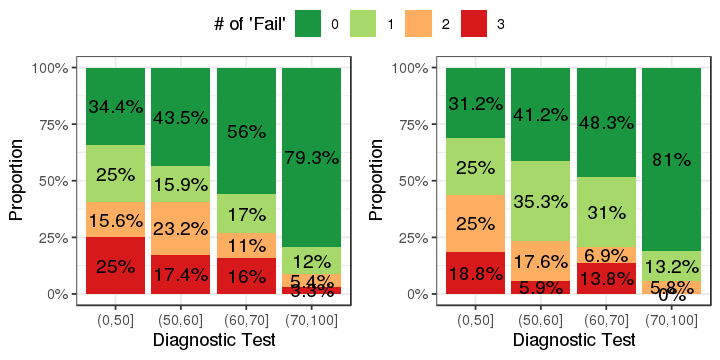

In [26]:
## ----- Something else -----

options(repr.plot.width  = 6, repr.plot.height = 3)
a <- c(0,50,60,70,100)
stack_prop_bar(joint_pre17, 1, a, plots=F)
stack_prop_bar(joint_17, 1, a, plots=F)
# pdf('../fig/REL_stackpropbar.pdf', width=7, height=3, onefile=F)
p1 <- stack_prop_bar(joint_pre17, 1, a)
p2 <- stack_prop_bar(joint_17, 1, a)
ggarrange(p1, p2, common.legend = T)
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)

In [27]:
joint_17 <- merge(joint_17, entryquals[c('AnonID', 'Qual', 'Category')], by='AnonID', all.x=T)
joint_17$Qual[which(is.na(joint_17$Qual))] <- 'Unknown'
joint_17$Category[which(is.na(joint_17$Category))] <- 'Unknown'

Warning message in is.na(joint_17$Qual):
“is.na() applied to non-(list or vector) of type 'NULL'”

ERROR: Error in `$<-.data.frame`(`*tmp*`, Qual, value = character(0)): replacement has 0 rows, data has 1422


In [ ]:
df <- joint_17[, c('AnonID', 'Total', 'Category', 'ILA')]
df <- df[!is.na(df$ILA),]
df$Interval <- cut(df$Total, c(0,50,60,70,100))

In [ ]:
levels(df$Interval) <- c(levels(df$Interval), 'Unknown')
df$Interval[is.na(df$Interval)] <- 'Unknown'

In [ ]:
addmargins(df.count <- table(Interval=df$Interval, Category=df$Category))

In [ ]:
df.count <- table(Interval=df$Interval[df$Interval!='Unknown'], Category=df$Category[df$Interval!='Unknown'])
df.freq <- data.frame(df.count)
df.prop <- data.frame(prop.table(df.count, margin=2))
df <- merge(df.freq, df.prop, by=c("Interval", "Category"))
df$Interval <- factor(as.character(df$Interval), rev(levels(df$Interval)))
df <- arrange(df, Category, rev(Interval))
df <- ddply(df, .(Category), transform, pos = cumsum(Freq.y) - (0.5 * Freq.y))

ggplot(df, aes(Category, Freq.y, fill=Interval)) +
    geom_bar(stat='identity', position='fill') +
    geom_text(data=df, aes(Category, pos, label=paste0(round(Freq.y * 100, 1), "%")), size=4) +
    scale_fill_brewer(palette='RdYlGn', direction=-1) + 
    scale_y_continuous(labels=percent_format()) + 
    labs(x='Category', y='Proportion')

In [ ]:
df1 <- joint_17[, c('AnonID', 'Y1Fs', 'Qual', 'Category', 'School')]
# df1 <- df1[df1$School=='Mathematics',]
dfib <- df1[df1$Qual=='IB',]
dfalv <- df1[df1$Qual=='A-Level',]
dfsqa <- df1[df1$Qual=='SQA',]
dfna <- df1[df1$Qual=='Unknown',]

dfib <- dfib[complete.cases(dfib),]
dfalv <- dfalv[complete.cases(dfalv),]
dfsqa <- dfsqa[complete.cases(dfsqa),]
dfna <- dfna[complete.cases(dfna),]

dfib.count <- table(Y1Fs=dfib$Y1Fs, Category=dfib$Category)
dfalv.count <- table(Y1Fs=dfalv$Y1Fs, Category=dfalv$Category)
dfsqa.count <- table(Y1Fs=dfsqa$Y1Fs, Category=dfsqa$Category)
dfna.count <- table(Y1Fs=dfna$Y1Fs, Category=dfna$Category)

dfib.prop <- data.frame(prop.table(dfib.count, margin=2))
dfalv.prop <- data.frame(prop.table(dfalv.count, margin=2))
dfsqa.prop <- data.frame(prop.table(dfsqa.count, margin=2))
dfna.prop <- data.frame(prop.table(dfna.count, margin=2))

dfib <- arrange(dfib.prop, Category, rev(Y1Fs))
dfalv <- arrange(dfalv.prop, Category, rev(Y1Fs))
dfsqa <- arrange(dfsqa.prop, Category, rev(Y1Fs))
dfna <- arrange(dfna.prop, Category, rev(Y1Fs))

dfib <- ddply(dfib, .(Category), transform, pos = cumsum(Freq) - (0.5 * Freq))
dfalv <- ddply(dfalv, .(Category), transform, pos = cumsum(Freq) - (0.5 * Freq))
dfsqa <- ddply(dfsqa, .(Category), transform, pos = cumsum(Freq) - (0.5 * Freq))
dfna <- ddply(dfna, .(Category), transform, pos = cumsum(Freq) - (0.5 * Freq))

addmargins(dfib.count)
addmargins(dfalv.count)
addmargins(dfsqa.count)
addmargins(dfna.count)

pib <- ggplot(dfib, aes(Category, Freq, fill=Y1Fs)) +
    geom_bar(stat='identity', position='fill') +
    geom_text(data=dfib, aes(Category, pos, label=paste0(round(Freq * 100, 1), "%")), size=4) +
    scale_fill_brewer(palette='RdYlGn', direction=-1) + 
    scale_y_continuous(labels=percent_format()) + 
    labs(x='IB', y='Proportion')
palv <- ggplot(dfalv, aes(Category, Freq, fill=Y1Fs)) +
    geom_bar(stat='identity', position='fill') +
    geom_text(data=dfalv, aes(Category, pos, label=paste0(round(Freq * 100, 1), "%")), size=4) +
    scale_fill_brewer(palette='RdYlGn', direction=-1) + 
    scale_y_continuous(labels=percent_format()) + 
    labs(x='A-Level/AS-Level', y='Proportion')
psqa <- ggplot(dfsqa, aes(Category, Freq, fill=Y1Fs)) +
    geom_bar(stat='identity', position='fill') +
    geom_text(data=dfsqa, aes(Category, pos, label=paste0(round(Freq * 100, 1), "%")), size=4) +
    scale_fill_brewer(palette='RdYlGn', direction=-1) + 
    scale_y_continuous(labels=percent_format()) + 
    labs(x='Higher/AH', y='Proportion')
pna <- ggplot(dfna, aes(Category, Freq, fill=Y1Fs)) +
    geom_bar(stat='identity', position='fill') +
    geom_text(data=dfna, aes(Category, pos, label=paste0(round(Freq * 100, 1), "%")), size=4) +
    scale_fill_brewer(palette='RdYlGn', direction=-1) + 
    scale_y_continuous(labels=percent_format()) + 
    labs(x='Unknown', y='Proportion')
options(repr.plot.width  = 8, repr.plot.height = 3)
ggarrange(palv, pib, psqa, pna, ncol=4, common.legend = T)
options(repr.plot.width  = 4, repr.plot.height = 3)

In [ ]:
df1 <- joint_17[, c('AnonID', 'Y1Fs', 'Category', 'Total', 'School')]
df1 <- df1[!is.na(df1$Y1Fs),]
# df1 <- df1[df1$School=='Mathematics',]
# df1$Category[df1$Category=='Cat2' & (df1$Total < 60 | is.na(df1$Total))] <- 'Cat2-'
# df1$Category[df1$Category=='Cat2' & (df1$Total > 60 & !is.na(df1$Total))] <- 'Cat2+'
# df1$Category[df1$Category=='Unknown' & (df1$Total < 60 | is.na(df1$Total))] <- 'Cat1'
# df1$Category[df1$Category=='Unknown' & (df1$Total > 60 & !is.na(df1$Total))] <- 'Cat3'
# df1$Category[df1$Category=='Unknown'] <- 'Cat3'

df2 <- df1

# df1$Category[df1$Category=='Cat1' & (df1$Total < 70 | is.na(df1$Total))] <- 'Cat1-'
# df1$Category[df1$Category=='Cat1' & (df1$Total > 70 & !is.na(df1$Total))] <- 'Cat1+'
# df1$Category[df1$Category=='Cat3' & (df1$Total < 50 | is.na(df1$Total))] <- 'Cat3-'
# df1$Category[df1$Category=='Cat3' & (df1$Total > 50 & !is.na(df1$Total))] <- 'Cat3+'

df2$Category[df1$Category %in% c('Cat1','Cat2-')] <- 'Cat1/2-'
df2$Category[df1$Category %in% c('Cat3','Cat2+')] <- 'Cat2+/3'

df1.count <- table(Y1Fs=df1$Y1Fs, Category=df1$Category)
df1.prop <- data.frame(prop.table(df1.count, margin=2))
df1 <- arrange(df1.prop, Category, rev(Y1Fs))
df1 <- ddply(df1, .(Category), transform, pos = cumsum(Freq) - (0.5 * Freq))

df2.count <- table(Y1Fs=df2$Y1Fs, Category=df2$Category)
df2.prop <- data.frame(prop.table(df2.count, margin=2))
df2 <- arrange(df2.prop, Category, rev(Y1Fs))
df2 <- ddply(df2, .(Category), transform, pos = cumsum(Freq) - (0.5 * Freq))

addmargins(df1.count)
addmargins(df2.count)
p1 <- ggplot(df1, aes(Category, Freq, fill=Y1Fs)) +
    geom_bar(stat='identity', position='fill', width=rep(colSums(prop.table(df1.count)), each=4)/max(colSums(prop.table(df1.count)))) +
    geom_text(data=df1, aes(Category, pos, label=paste0(round(Freq * 100, 1), "%")), size=4) +
    scale_fill_brewer(palette='RdYlGn', direction=-1) + 
    scale_y_continuous(labels=percent_format()) + 
    labs(x='Category', y='Proportion')
p2 <- ggplot(df2, aes(Category, Freq, fill=Y1Fs)) +
    geom_bar(stat='identity', position='fill') +
    geom_text(data=df2, aes(Category, pos, label=paste0(round(Freq * 100, 1), "%")), size=4) +
    scale_fill_brewer(palette='RdYlGn', direction=-1) + 
    scale_y_continuous(labels=percent_format()) + 
    labs(x='Category', y='Proportion')
options(repr.plot.width  = 6, repr.plot.height = 3)
ggarrange(p1, p2, ncol=2, common.legend = T)
options(repr.plot.width  = 4, repr.plot.height = 3)

In [ ]:
df1 <- joint_17[, c('AnonID', 'Y1Fs', 'Category')]
df1 <- df1[complete.cases(df1),]
data1.count <- table(Y1Fs=df1$Y1Fs, Category=df1$Category)
df1.freq <- data.frame(data1.count)
df1.prop <- data.frame(prop.table(data1.count, margin=2))
df1 <- merge(df1.freq, df1.prop, by=c("Y1Fs", "Category"))

In [ ]:
df1 <- arrange(df1, Category, rev(Y1Fs))
df1 <- ddply(df1, .(Category), transform, pos = cumsum(Freq.y) - (0.5 * Freq.y))
df1

In [ ]:
table(joint_17$Region[joint_17$Category=='Unknown' & !is.na(joint_17$ILA)])